In [1]:
from google.colab import drive
drive.mount('/content/drive')  # 구글 드라이브 마운트

Mounted at /content/drive


In [ ]:
! pip install --upgrade -qq git+https://github.com/huggingface/diffusers.git transformers accelerate

In [2]:
# (English) Installing diffusers version 0.3.1 as you requested.
# (한국어) 요청하신 대로 diffusers 버전 0.3.1을 설치합니다.
! pip install --quiet diffusers==0.31.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 40.2 MB/s eta 0:00:00


In [3]:
import diffusers

# (English) This code prints the installed version of the diffusers library.
# (한국어) 이 코드는 diffusers 라이브러리의 설치된 버전을 출력합니다.
print("Diffusers version:", diffusers.__version__)


Diffusers version: 0.31.0


### Text-to-Image Generation


In [4]:
import torch
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler

device = "cuda"

# 파이프라인 불러오기
repo_id = "stabilityai/stable-diffusion-2-base"
pipe = DiffusionPipeline.from_pretrained(repo_id, torch_dtype=torch.float16)

pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to(device)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

scheduler%2Fscheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

(…)ure_extractor%2Fpreprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer%2Fspecial_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer%2Fvocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

tokenizer%2Ftokenizer_config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

text_encoder%2Fconfig.json:   0%|          | 0.00/738 [00:00<?, ?B/s]

tokenizer%2Fmerges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

unet%2Fconfig.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

vae%2Fconfig.json:   0%|          | 0.00/716 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

##### 하나의 이미지 생성하기


아래 코드를 실행하면 빈 칸이 표시됩니다. 위에서 작성한 프롬프트를 입력하고 엔터를 눌러보세요.  
input() 함수를 사용하면 사용자가 입력한 값이 변수에 저장됩니다.  
모델이 처리할 수 있는 토큰의 최대 길이는 77이므로, 너무 긴 프롬프트는 잘릴 수 있으니 적절한 길이로 작성해주세요.


In [39]:
prompt = str(input('prompt:'))  # 프롬프트를 영어로 입력해보세요

prompt:blurred, dreamlike atmosphere


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

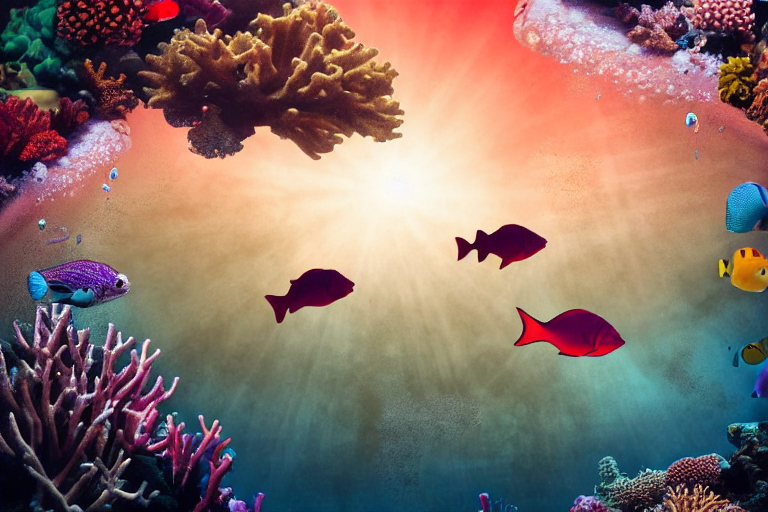

In [40]:
# 이미지 저장 폴더 만들기
import os


# diffusers 폴더 생성 (구글 드라이브 내)
save_path = '/content/drive/MyDrive/diffusers'
os.makedirs(save_path, exist_ok=True)  # exist_ok=True로 설정하면 폴더가 이미 있어도 에러가 발생하지 않습니다

# 입력한 프롬프트를 사용하여 이미지 생성
# image = pipe(prompt, num_inference_steps=25).images[0]
img2img_pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    model_path,
    torch_dtype=torch.float16,
)
img2img_pipe = img2img_pipe.to(device)

# 이미지 저장 (구글 드라이브에)
image.save(f"{save_path}/image.png")

# 이미지 출력
image

아래의 하이퍼파라미터를 변화시키면 더 멋진 이미지가 나올 수 있습니다.  

- height, width: 생성될 이미지의 가로와 세로 픽셀 크기를 조절할 수 있습니다. 8의 배수로 설정해 주세요.  
- num_inference_steps: denoising 스텝 수로, 값이 커질수록 고해상도 이미지가 출력되지만 출력되는 시간이 오래 걸립니다. default 값은 50입니다.
- guidance_scale: 얼마나 주어진 프롬프트에 근접한 이미지를 생성할지를 설정하는 하이퍼파라미터로, 값이 커질수록 문자열에 근접한 이미지가 생성되지만 이미지 품질이 떨어질 수 있습니다. default는 7.5입니다.

  0%|          | 0/30 [00:00<?, ?it/s]

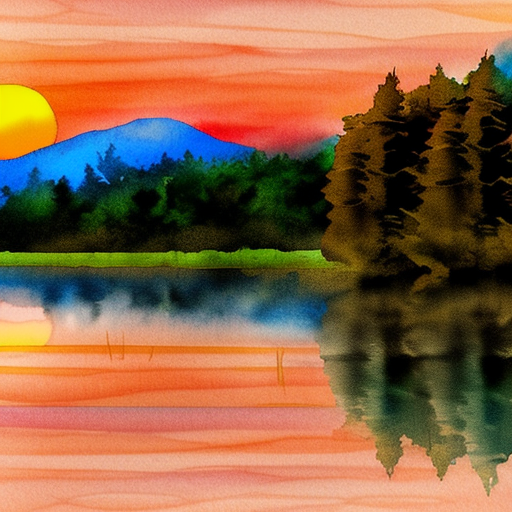

In [10]:
# 원하는 설정으로 이미지를 생성해보세요

new_image = pipe(
    prompt="A serene lakeside sunset in watercolor style",  # 생성하고자 하는 이미지에 대한 프롬프트
    height=512,                                           # 이미지 높이 (8의 배수로 설정)
    width=512,                                            # 이미지 너비 (8의 배수로 설정)
    num_inference_steps=30,                               # 더 높은 품질을 위한 denoising 스텝 수
    guidance_scale=7.5                                    # 프롬프트와의 유사도를 조절
).images[0]

# 생성된 이미지 저장
new_image.save(f"{save_path}/my_generated_image.png")

# 생성된 이미지 표시
new_image

##### 여러 개의 이미지 생성하기  
이번에는 하나의 프롬프트로 여러 개의 이미지를 생성해 봅시다.

이미지 처리를 해주는 파이썬 라이브러리인 pillow를 사용하여 여러 개의 이미지를 담을 틀을 먼저 만들어 줍니다.

In [11]:
# 파이썬 이미지 처리 라이브러리 pillow 불러오기
from PIL import Image

# 틀 만들기
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows * cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols * w, rows * h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box = (i%cols * w, i // cols * h))
    return grid

틀을 만들어 주었으니 원하는 이미지를 출력해 볼까요?

출력하고 싶은 이미지의 개수를 적어주고, 프롬프트를 리스트 안에 적어주세요. 아래의 코드에서는 1개의 프롬프트만 사용했지만 여러 개의 프롬프트를 사용할 수도 있어요.

주의할 점은 이미지의 개수는 이미지를 담을 틀의 개수와 동일해야 한다는 것이에요. assert len(imgs) == rows * cols라는 코드에서 볼 수 있듯이, 출력하고 싶은 이미지의 개수가 6개라면 행과 열은 2와 3으로 설정해 주어야 해요. 3과 2, 1과 6도 가능하겠죠?

In [12]:
# 이미지의 개수
num_images = 6

# 프롬프트 입력
prompt = ['a horse riding a person'] * num_images

# 이미지 생성
images = pipe(prompt).images

# 이미지 출력
grid = image_grid(images, rows= 3, cols= 2)
grid

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
prompt1 = 'A confident and attractive man in his thirties, wearing a tailored black coat and a yellow scarf with a brown pattern, standing near a sleek modern glass skyscraper in London, engaged in a phone call, his expression focused and serious, shot from a low-angle perspective looking up at him, the reflection of the city lights visible on the glass building behind him, cool urban tones with a cinematic contrast, slight motion blur from city life in the background, realistic lighting highlighting the contours of his face, immersive street photography style with natural depth of field, a dramatic and moody atmosphere'
prompt2 = 'beautiful woman, confident and stylish, open trench coat, white tank top, black skirt, holding her hair up with one hand, standing in a city, bright sunlight, soft pastel color palette, cinematic street photography, natural lighting, warm highlights, soft shadows, gentle breeze effect, dreamy and airy atmosphere, bokeh effect in background, ultra-detailed textures, photorealistic, HDR, RAW photo, high fashion editorial style, film-like grain, golden hour glow, Vogue-inspired street photography, modern cityscape'
prompt3 = 'A young woman standing on the sandy beach during a golden sunset, smiling warmly as the soft ocean breeze tousles her hair, the warm glow of the sun casting a golden hue on her skin, gentle waves rolling onto the shore in the background, the sky painted with shades of pink, orange, and purple, her dress flowing slightly in the wind, a relaxed and joyful expression, natural and candid moment, cinematic lighting, soft depth of field with bokeh effect, highly detailed textures, photorealistic quality, dreamy and serene atmosphere'
prompt4 = 'A full-body portrait of an elegant Asian male model, wearing high-waisted trousers and a soft, fitted sweater, standing gracefully in front of lush green trees under a vast blue sky, captured from a low-angle perspective, exuding a calm and sophisticated aura, the white and neutral color palette complementing the natural setting, soft natural light creating a gentle glow on the skin, a subtle breeze adding movement to the scene, a refined and modern fashion aesthetic, clear details in fabric texture and facial features, shallow depth of field with a dreamy blurred background, an ethereal yet contemporary feel inspired by the signature photography style of Hidemi Shimura'
prompt5 = 'A full-body portrait of an elegant Asian male model, wearing high-waisted trousers and a soft, fitted sweater, standing gracefully in front of lush green trees under a vast blue sky, captured from a low-angle perspective, exuding a calm and sophisticated aura, the white and neutral color palette complementing the natural setting, soft natural light creating a gentle glow on the skin, a subtle breeze adding movement to the scene, a refined and modern fashion aesthetic, clear details in fabric texture and facial features, shallow depth of field with a dreamy blurred background, an ethereal yet contemporary feel inspired by the signature photography style of Hidemi Shimura'
prompt6 = 'A blonde woman sitting inside a cozy, well-lit café, gently holding a coffee cup with both hands, her gaze slightly downward in a moment of quiet contemplation, soft natural light streaming through a large window, warm wooden furniture and neutral tones creating a relaxed and inviting atmosphere, captured with a shallow depth of field that subtly blurs the background, giving a sense of intimacy, the scene rich with natural textures, soft highlights, and organic warmth, styled in the manner of candid lifestyle photography, taken with a Sony A7R V, featuring crisp details and an ultra-realistic look, evoking the comfort of a peaceful morning or afternoon'

In [ ]:

# 18번 셀에서 정의한 6가지 프롬프트를 사용해 이미지를 생성하고, 3x2 그리드로 출력합니다.
num_images = 6
prompts = [prompt1, prompt2, prompt3, prompt4, prompt5, prompt6]

images = pipe(prompts).images
grid = image_grid(images, rows=3, cols=2)
grid

In [13]:
#이미지의 개수와 프롬프트를 변경해 가면서 다양한 이미지를 생성해 보세요.
# Q. 다양한 이미지를 생성해 보세요.
# 이미지의 개수
num_images = 9

# 다양한 프롬프트 입력
prompts = [
    'a cat playing piano',
    'a dog surfing on beach',
    'an elephant painting',
    'a penguin wearing a tuxedo',
    'a giraffe drinking coffee',
    'a panda doing yoga',
    'a monkey coding on computer',
    'a rabbit cooking in kitchen',
    'a lion reading a book'
]

# 이미지 생성
images = pipe(prompts).images

# 3x3 그리드로 이미지 출력
grid = image_grid(images, rows=3, cols=3)
grid





Output hidden; open in https://colab.research.google.com to view.

다양한 이미지를 생성하다 보면 RuntimeError: CUDA out of memory.가 나올 때가 있을 거에요. 그럴 때는 아래의 코드를 사용해 보세요.






In [ ]:
# GPU 메모리를 지우는 코드입니다.
torch.cuda.empty_cache()

### Image-to-Image Generation


mage-to-Image Generation은 프롬프트뿐 아니라 이미지를 입력으로 넣으면 다른 이미지로 변형시켜 주는 기능입니다. 앞의 영상에서 언급되었던 'AI야 우리 딸 아이 그림 좀 손봐줘'가 이 기능을 사용한 것이죠.

Diffusers에는 이 기능이 포함된 파이프라인을 이미 만들어 두었기 때문에 파이프라인을 불러오기만 하면 쉽게 모델을 사용할 수 있습니다.

In [14]:
# Image-to-Image Generation 파이프라인 불러오기
from diffusers import StableDiffusionImg2ImgPipeline

device = "cuda"
model_path = "CompVis/stable-diffusion-v1-4"

pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    model_path,
    torch_dtype=torch.float16,
)
pipe = pipe.to(device)

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

scheduler%2Fscheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

text_encoder%2Fconfig.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

(…)oints%2Fscheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

safety_checker%2Fconfig.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

tokenizer%2Fmerges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

(…)ure_extractor%2Fpreprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer%2Ftokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer%2Fspecial_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer%2Fvocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet%2Fconfig.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae%2Fconfig.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

##### 하나의 이미지 생성하기  

사용할 이미지를 불러옵시다.

이미지를 클라우드에 올려서 사용해도 되고, 아래의 코드와 같이 인터넷에 있는 이미지를 가져와도 좋습니다. 여기서는 허깅페이스에서 제공하는 기본 이미지를 사용해 볼게요.


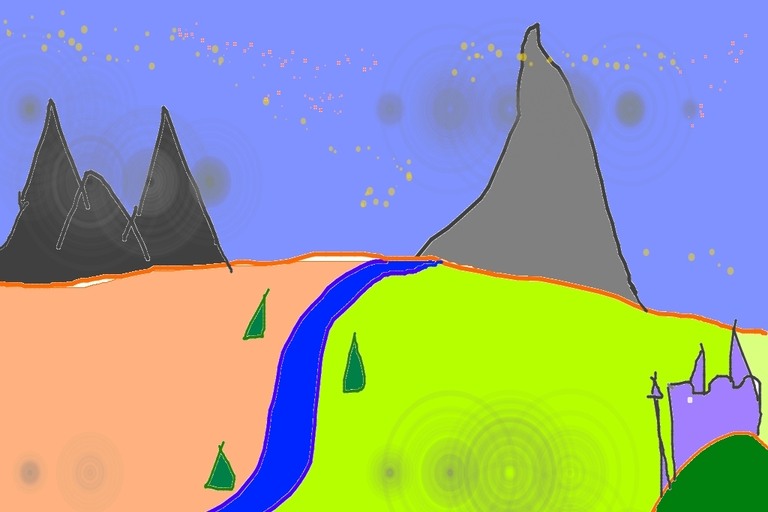

In [15]:
import requests
from io import BytesIO

url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"

# url 호출하기
response = requests.get(url)

# 이미지 열기
init_img = Image.open(BytesIO(response.content)).convert("RGB")  # 이미지를 메모리로 읽어와서 RGB로 변경합니다.
init_img = init_img.resize((768, 512))  # 이미지의 크기를 조절합니다.
init_img

이미지를 클라우드에 올려 사용하려면 아래 코드의 주석을 풀고 사용해 보세요.






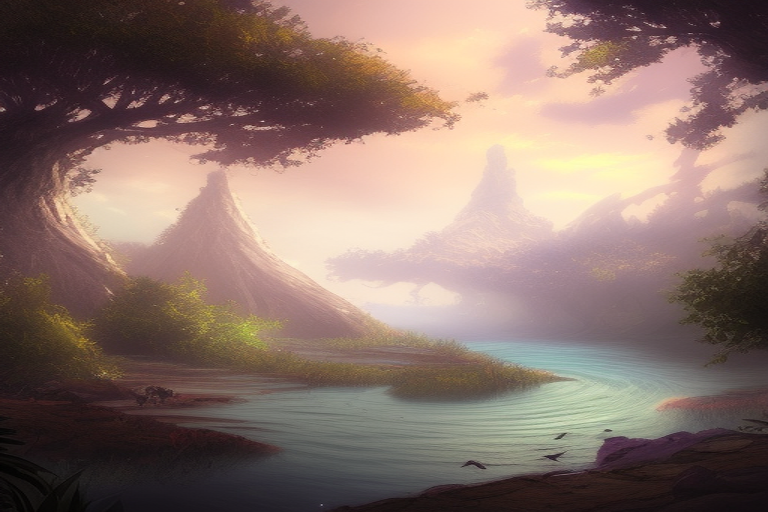

In [16]:
init_img = Image.open("/content/drive/MyDrive/diffusers/image.png", mode = 'r')
init_img = init_img.resize((768, 512))
init_img

불러온 이미지를 내가 원하는 스타일로 변경할 수 있도록 프롬프트를 작성해 주세요.






In [19]:
prompt = "A majestic crystal castle floating above an enchanted forest, shimmering in soft moonlight, cinematic lighting"

이미지를 생성하고 저장해 보겠습니다. 아래의 코드에는 조절할 수 있는 하이퍼파라미터가 있습니다.

- seed: 동일한 입력 문장과 각종 설정을 넣었을 때 동일한 시드 값을 주면 같은 이미지를 생성할 수 있습니다.
- strength: 레퍼런스 이미지에서 얼마나 변형할지를 설정하는 하이퍼파라미터로, 값이 커질수록 원본 이미지와 다른 이미지를 생성합니다. 0과 1 사이의 값을 선택할 수 있으며, default는 0.8입니다.
- guidance_scale: 얼마나 주어진 프롬프트에 근접한 이미지를 생성할지를 설정하는 하이퍼파라미터로, 값이 커질수록 문자열에 근접한 이미지가 생성되지만 이미지 품질이 떨어질 수 있습니다. default는 7.5입니다.
- num_inference_steps: denoising 스텝 수로, 값이 커질수록 고해상도 이미지가 출력되지만 출력되는 시간이 오래 걸립니다.






  0%|          | 0/37 [00:00<?, ?it/s]

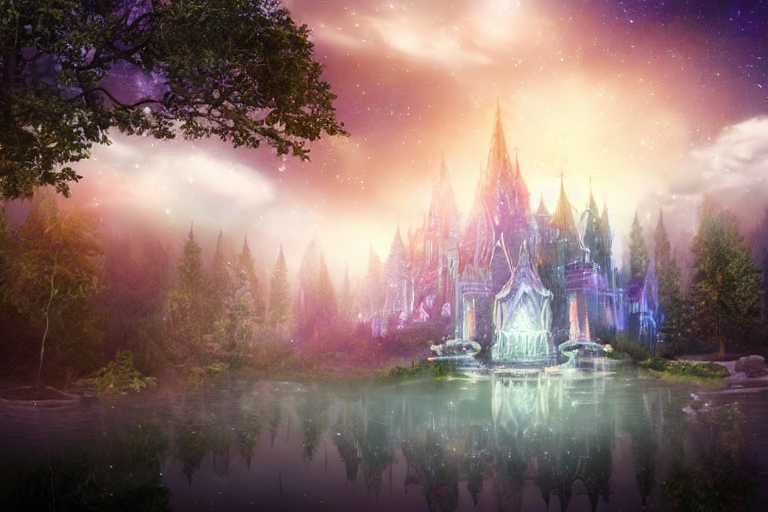

In [20]:
generator = torch.Generator(device=device).manual_seed(1024)   # 모델을 사용할 때마다 동일한 이미지를 생성하기 위해 seed를 설정합니다.

images = pipe(prompt=prompt, image=init_img, strength=0.75, guidance_scale=7.5).images
images[0].save("/content/drive/MyDrive/diffusers/fantasy_landscape.png")
images[0]

  0%|          | 0/45 [00:00<?, ?it/s]

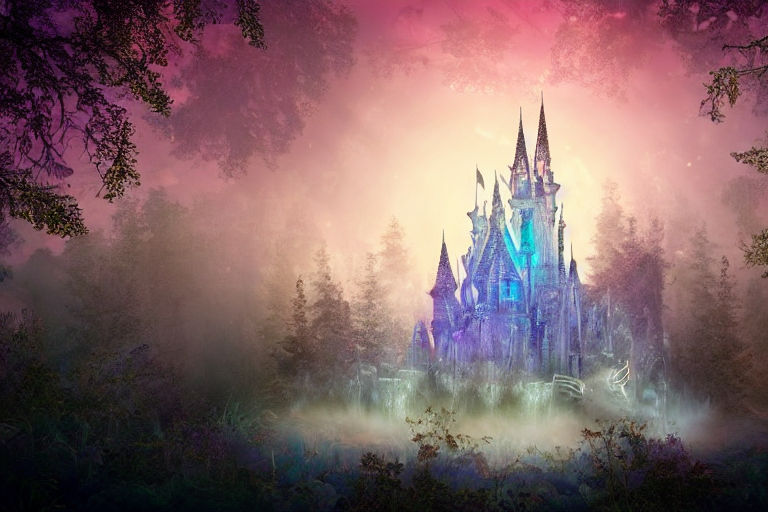

In [22]:
# 1. strength 값을 높여서 원본 이미지와 더 다른 이미지 생성
# 1. Increase strength to generate more different images from original
generator = torch.Generator(device=device).manual_seed(1024)
images = pipe(prompt=prompt, image=init_img, strength=0.9, guidance_scale=7.5).images
images[0].save("/content/drive/MyDrive/diffusers/fantasy_landscape_high_strength.png")
images[0]

  0%|          | 0/37 [00:00<?, ?it/s]

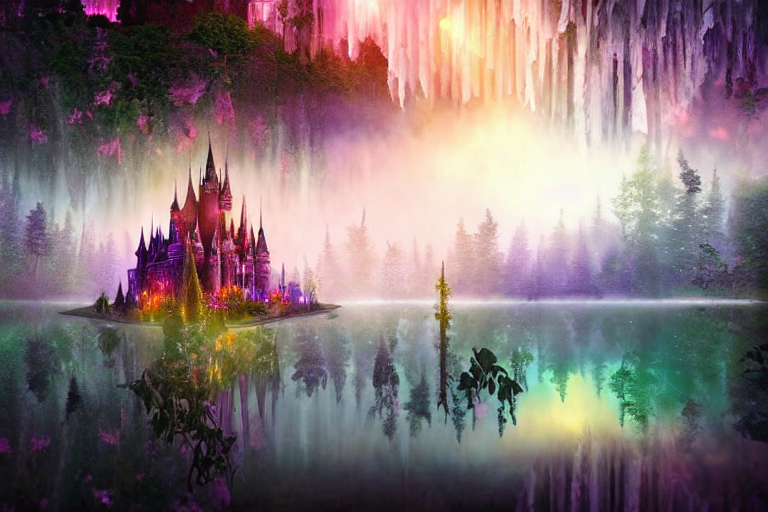

In [23]:
# 2. guidance_scale 값을 높여서 프롬프트에 더 근접한 이미지 생성
# 2. Increase guidance_scale to generate images closer to prompt
generator = torch.Generator(device=device).manual_seed(1024)
images = pipe(prompt=prompt, image=init_img, strength=0.75, guidance_scale=15).images
images[0].save("/content/drive/MyDrive/diffusers/fantasy_landscape_high_guidance.png")
images[0]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

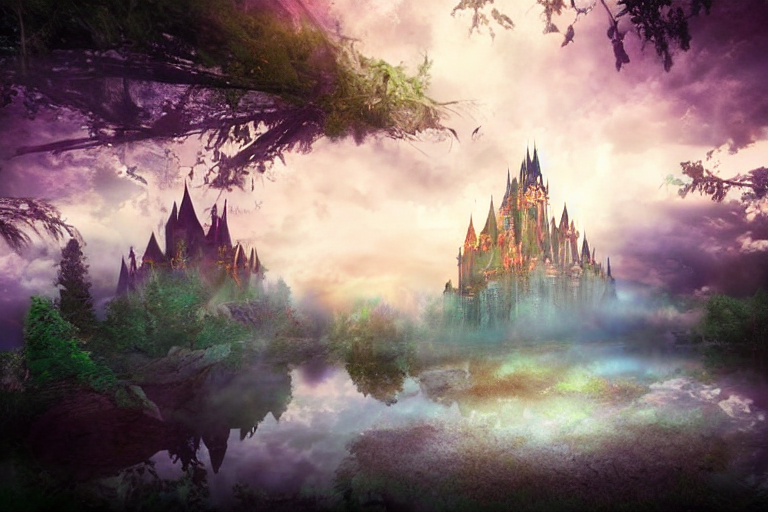

In [21]:
# Q. 하이퍼파라미터를 변경하면서 다양한 이미지를 생성해 보세요.
# 다양한 하이퍼파라미터로 이미지 생성해보기
# Try generating images with different hyperparameters

# 3. 다른 시드값으로 다양한 이미지 생성
# 3. Generate different images with different seeds
generator = torch.Generator(device=device).manual_seed(42)
images = pipe(prompt=prompt, image=init_img, strength=0.75, guidance_scale=7.5).images
images[0].save("/content/drive/MyDrive/diffusers/fantasy_landscape_different_seed.png")
images[0]

##### 여러 개의 이미지 생성하기

여러 개의 프롬프트를 사용하여 여러 장의 이미지를 한번에 생성할 수도 있습니다. Text-to-Image Generation에서 사용했던 코드를 사용하였으니 코드를 자유롭게 변경해 보세요.

/usr/local/lib/python3.11/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion_img2img.py:768: FutureWarning: You have passed 2 text prompts (`prompt`), but only 1 initial images (`image`). Initial images are now duplicating to match the number of text prompts. Note that this behavior is deprecated and will be removed in a version 1.0.0. Please make sure to update your script to pass as many initial images as text prompts to suppress this warning.
  deprecate("len(prompt) != len(image)", "1.0.0", deprecation_message, standard_warn=False)


  0%|          | 0/45 [00:00<?, ?it/s]

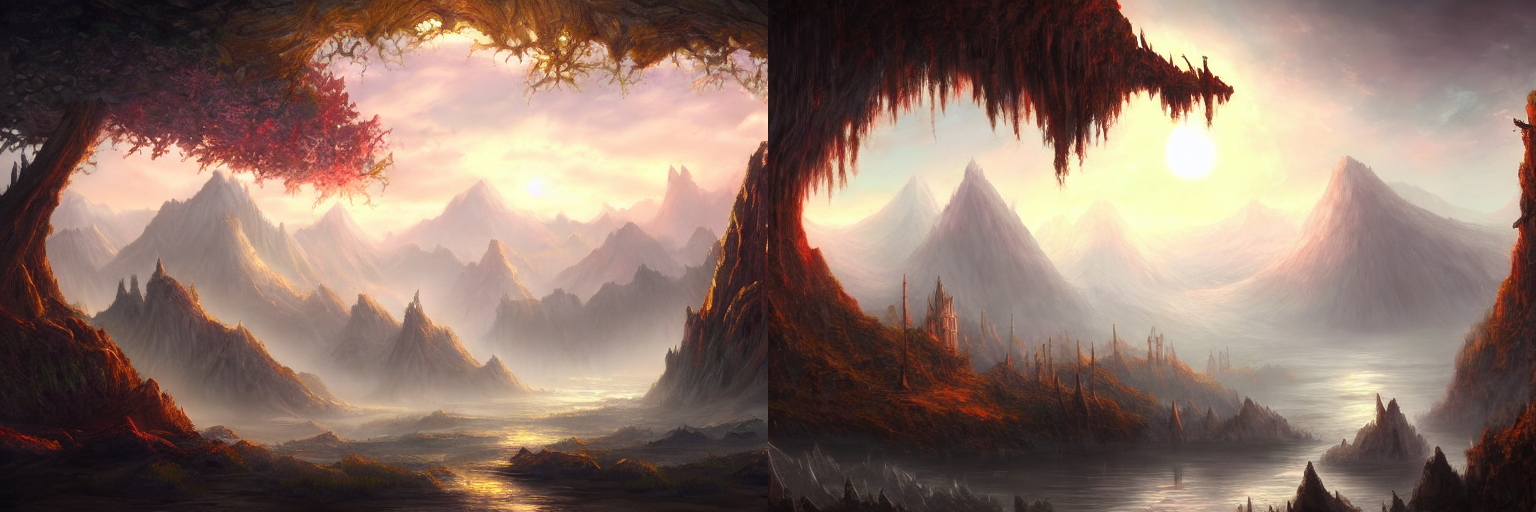

In [24]:
num_images = 2

# 프롬프트 입력
prompt = ['A fantasy landscape, trending on artstation'] * num_images

# 이미지 생성
generator = torch.Generator(device=device).manual_seed(1024)
images = pipe(prompt=prompt, image=init_img, strength=0.9, guidance_scale=13.5, num_inference_steps=50, generator=generator).images
images

# 이미지 출력
grid = image_grid(images, rows=1, cols=2)
grid

In [25]:
# 다양한 이미지를 생성해 보세요.
# 다양한 프롬프트로 여러 이미지 생성
# Generate multiple images with different prompts
prompts = [
    "A magical forest with glowing mushrooms and fairies, digital art",
    "A futuristic cyberpunk city at night with neon lights",
    "A peaceful mountain landscape with a lake at sunset",
    "An underwater scene with coral reefs and tropical fish"
]

num_images = len(prompts)
generator = torch.Generator(device=device).manual_seed(42)

# 이미지 생성
# Generate images
images = pipe(
    prompt=prompts,
    image=init_img,
    strength=0.85,
    guidance_scale=10.0,
    num_inference_steps=50,
    generator=generator
).images

# 이미지 그리드로 출력
# Display images in a grid
grid = image_grid(images, rows=2, cols=2)
grid

# 이미지 저장
# Save images
for i, image in enumerate(images):
    image.save(f"/content/drive/MyDrive/diffusers/generated_image_{i+1}.png")

/usr/local/lib/python3.11/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion_img2img.py:768: FutureWarning: You have passed 4 text prompts (`prompt`), but only 1 initial images (`image`). Initial images are now duplicating to match the number of text prompts. Note that this behavior is deprecated and will be removed in a version 1.0.0. Please make sure to update your script to pass as many initial images as text prompts to suppress this warning.
  deprecate("len(prompt) != len(image)", "1.0.0", deprecation_message, standard_warn=False)


  0%|          | 0/42 [00:00<?, ?it/s]